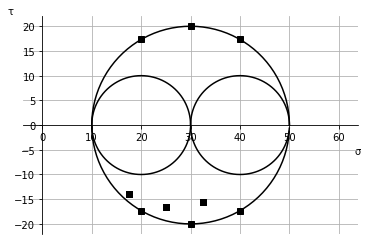

Strike	Dip	Normal	Trend	Plunge	Shear	Trend	Plunge	
0.0	30.0	20.000	270.0	60.0	17.321	270.0	-30.0
0.0	45.0	30.000	270.0	45.0	20.000	270.0	-45.0
0.0	60.0	40.000	270.0	30.0	17.321	270.0	-60.0
180.0	30.0	20.000	90.0	60.0	-17.321	90.0	-30.0
180.0	45.0	30.000	90.0	45.0	-20.000	90.0	-45.0
180.0	60.0	40.000	90.0	30.0	-17.321	90.0	-60.0
45.0	30.0	17.500	315.0	60.0	-13.919	291.0	-27.8
45.0	45.0	25.000	315.0	45.0	-16.583	281.3	-39.8
45.0	60.0	32.500	315.0	30.0	-15.612	261.9	-46.1
225.0	30.0	17.500	135.0	60.0	-13.919	111.0	-27.8
225.0	45.0	25.000	135.0	45.0	-16.583	101.3	-39.8
225.0	60.0	32.500	135.0	30.0	-15.612	81.9	-46.1


In [3]:
# Import libraries
import numpy as np
pi = np.pi

# Import StressMohrCircle
import sys, os
sys.path.append(os.path.abspath('../functions'))
from StressMohrCircle import StressMohrCircle

# Stress tensor in principal stress coordinate system
stress = np.array([[50, 0, 0],[ 0, 30, 0],[ 0, 0, 10]])

# Trend and plunge of sigma1, and trend of sigma3
tX1, pX1, tX3 = np.radians([90, 0, 90])

# Planes
planes = np.zeros((12,2))
# Strikes in degrees
planes[0:3,0] = 0
planes[3:6,0] = 180
planes[6:9,0] = 45
planes[9:12,0] = 225
# Dips in degrees
planes[0:12:3,1] = 30
planes[1:12:3,1] = 45
planes[2:12:3,1] = 60

# Convert to radians
planes = planes * pi/180
 
# Plot Mohr Circle
ns, ons = StressMohrCircle(stress,tX1,pX1,tX3,planes)

# Print normal and shear tractions
print('Strike\tDip\tNormal\tTrend\tPlunge\tShear\tTrend\tPlunge\t')
# return to degrees
planes = planes*180/pi
ons = ons*180/pi
# print
for i in range(0,np.size(planes,0)):
    print('{:.1f}\t{:.1f}\t{:.3f}\t{:.1f}\t{:.1f}\t{:.3f}\t{:.1f}\t{:.1f}'.format(planes[i,0],planes[i,1],ns[i,0],ons[i,0],ons[i,1],ns[i,1],ons[i,2],ons[i,3]))